#                       Clustering Analysis

# Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
# Loading the dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Data Preprocessing

In [3]:
# Handling missing values
data.dropna(inplace=True)

In [4]:
# Removing outliers
from scipy import stats
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [5]:
# feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

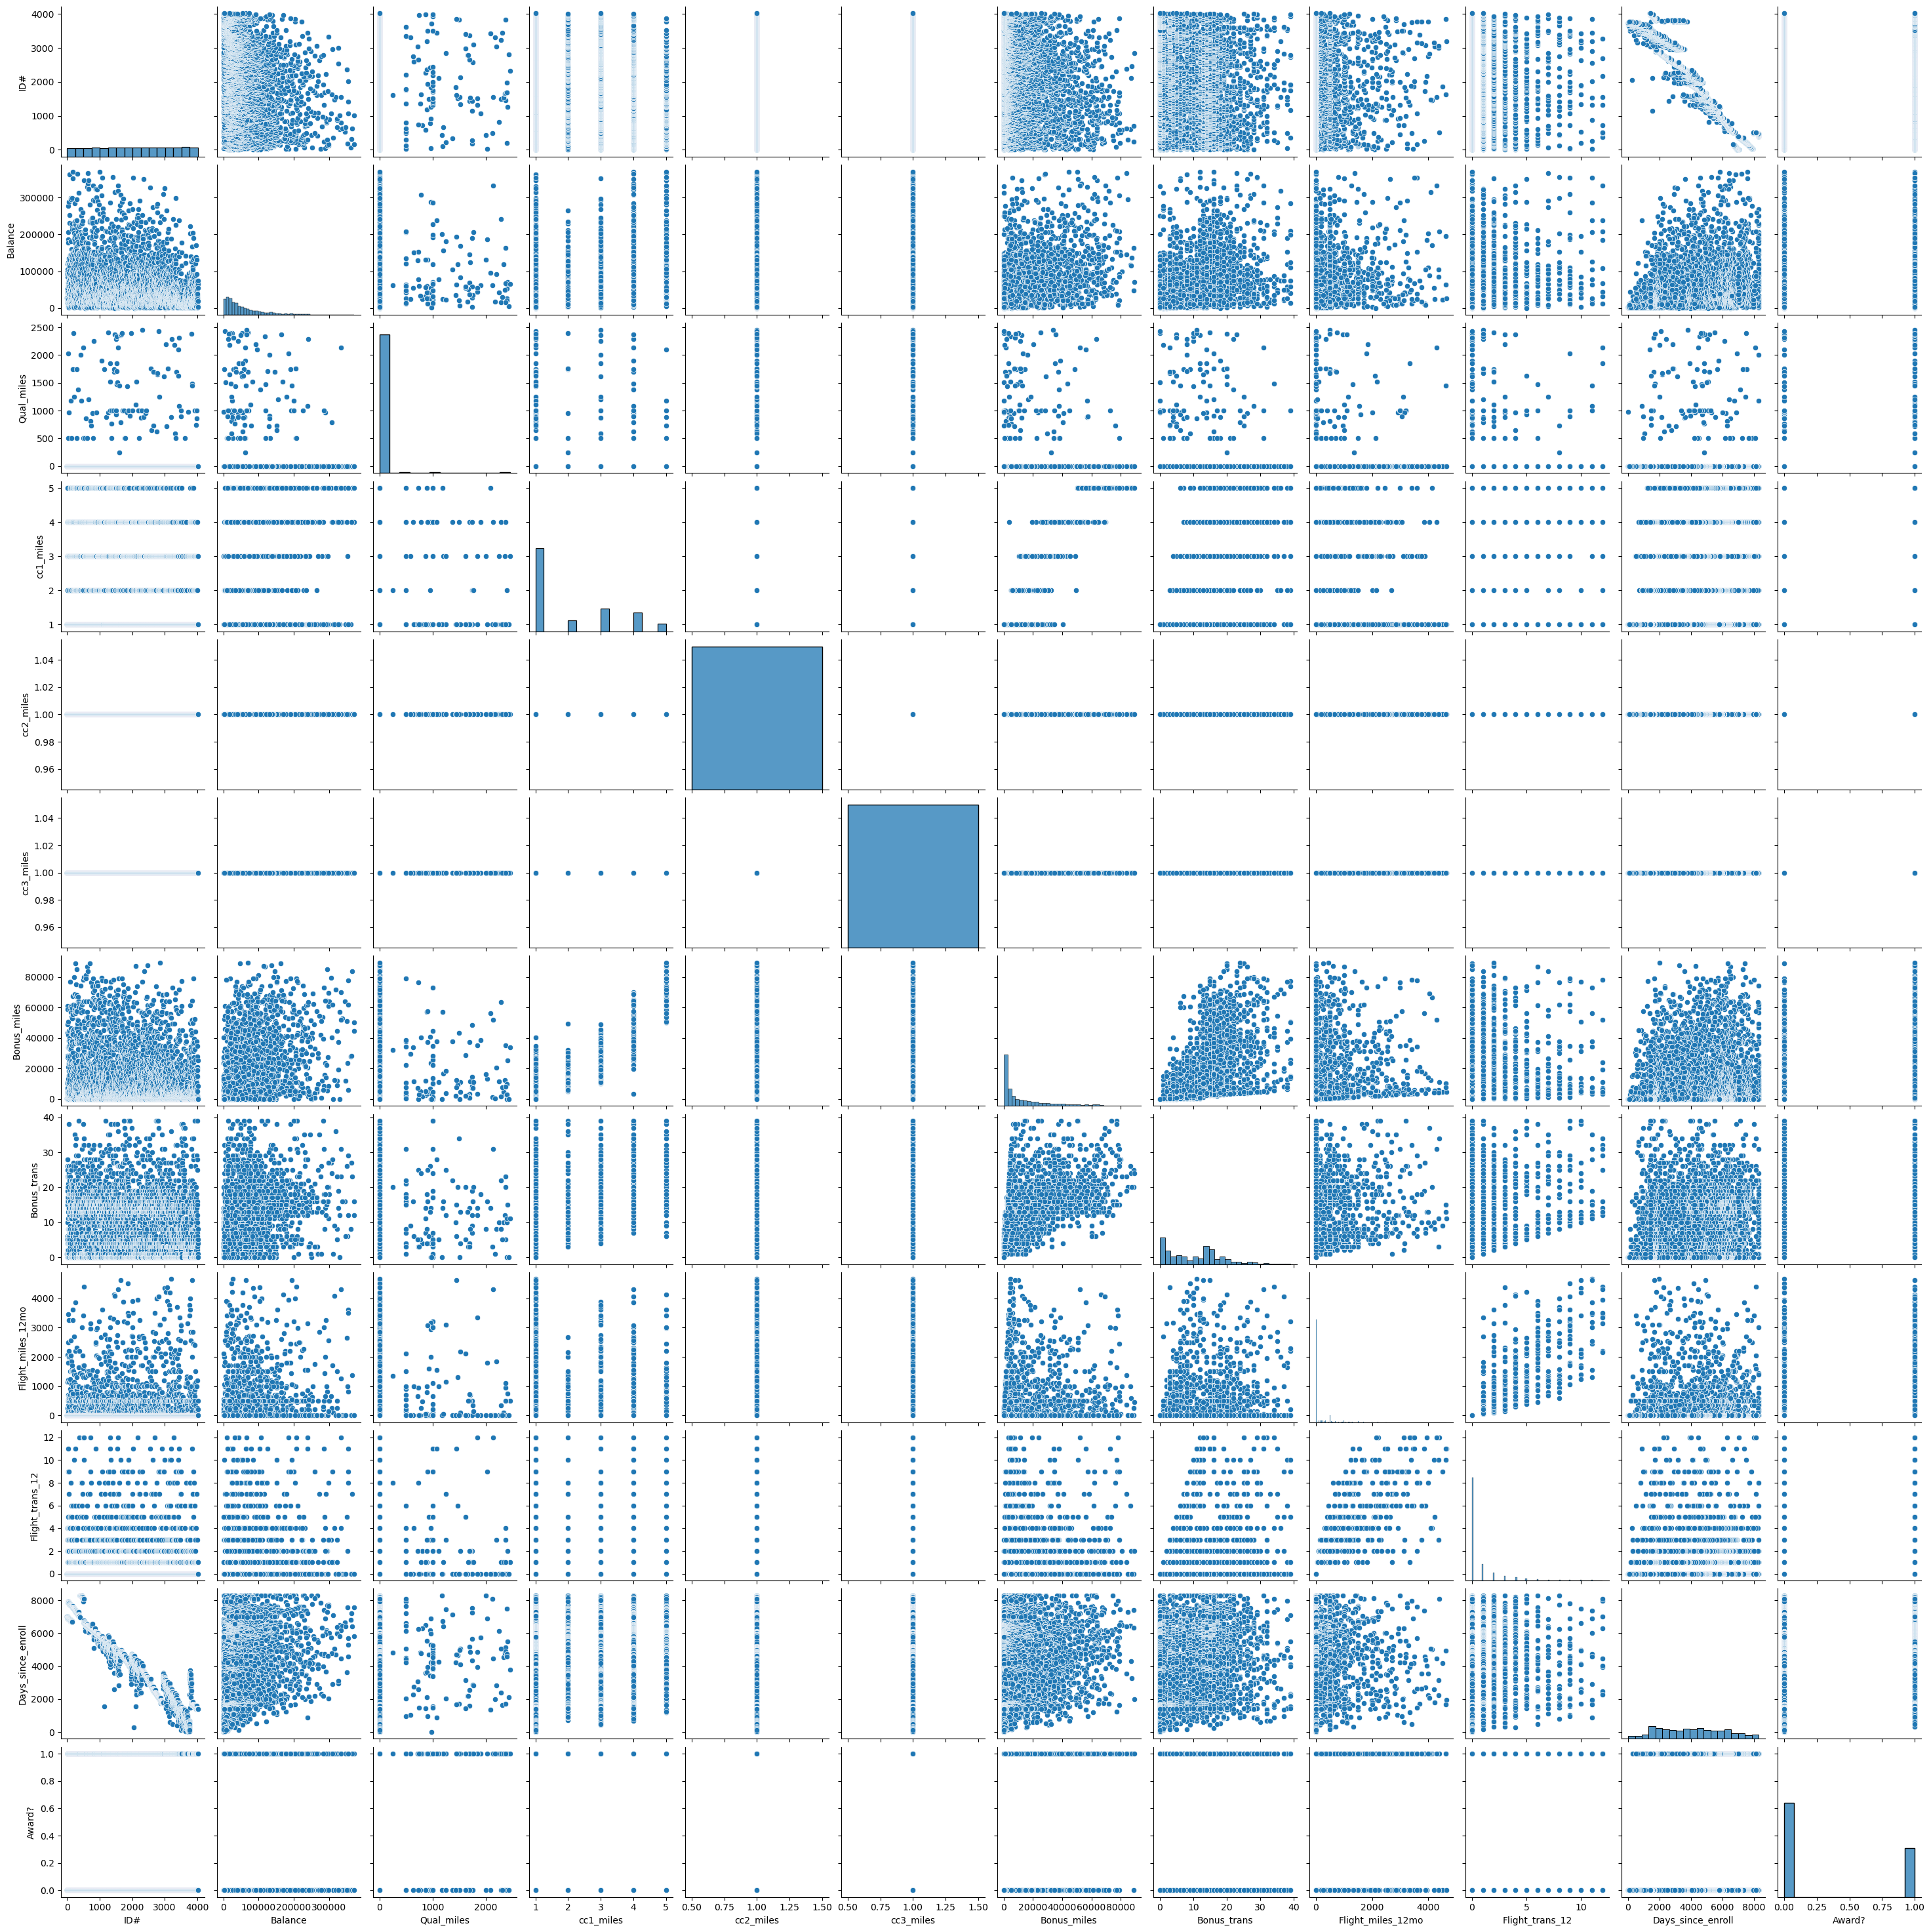

In [6]:
# Performing Exploratory Data Analysis (EDA)
# using pairplot to visualize pairwise relationships
sns.pairplot(data)
plt.show()

# Implementing Clustering Algorithms

In [8]:
# K-Means
# Finding optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


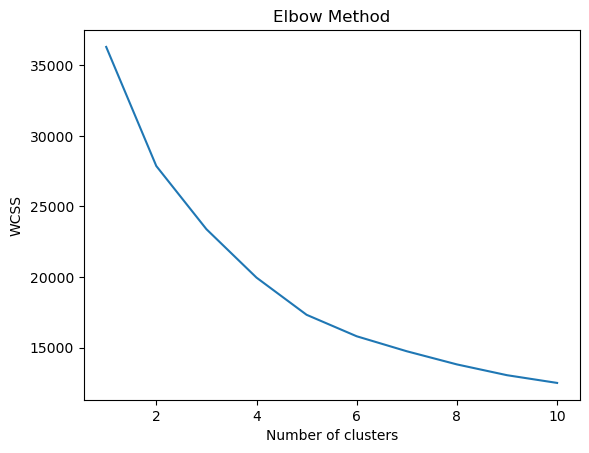

In [9]:
# Ploting the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Based on the Elbow curve, choose the optimal number of clusters and fit K-Means
optimal_k = 3  # we can change this value based on the Elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

# Hierarchical Clustering

In [11]:
# You can choose the linkage criteria based on your data
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(scaled_data)

# DBSCAN

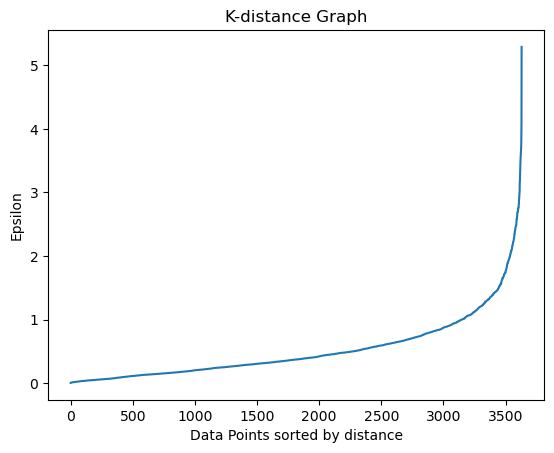

In [12]:
# Finding optimal epsilon using NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data)
distances, indices = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [13]:
# Based on the K-distance graph, choose epsilon
epsilon = 0.5
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [14]:
dbscan_labels

array([ 0,  0,  0, ..., -1, 24,  0], dtype=int64)

# Visualization

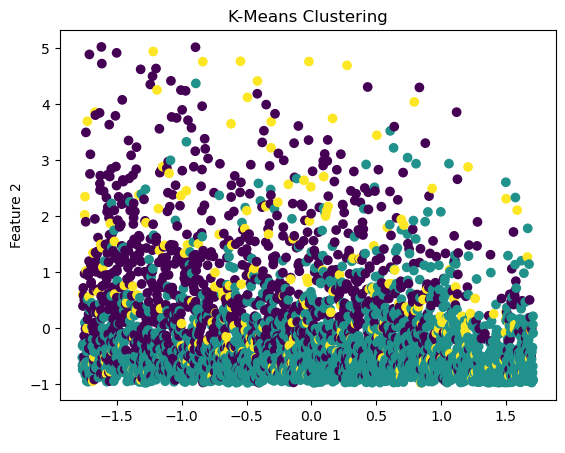

In [15]:
# Ploting the clusters using scatter plot
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluation and Performance Metrics

In [16]:
# Silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.29208662652066236


In [17]:
# Silhouette score for DBSCAN
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

DBSCAN Silhouette Score: -0.3994552312980999


In [18]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} centroid:", centroid)

Cluster 1 centroid: [1.53269941e+03 9.72602218e+04 3.71253175e+01 3.50211685e+00
 1.00000000e+00 1.00000000e+00 3.24965970e+04 1.72963590e+01
 1.42880610e+02 4.58086367e-01 4.99331837e+03 5.62235394e-01]
Cluster 2 centroid: [2.33048795e+03 3.65843920e+04 2.71959982e+01 1.18644839e+00
 1.00000000e+00 1.00000000e+00 3.97355616e+03 6.16916780e+00
 9.64470214e+01 3.45611642e-01 3.53184493e+03 1.88722146e-01]
Cluster 3 centroid: [1.926888e+03 9.748798e+04 1.601720e+02 2.020000e+00 1.000000e+00
 1.000000e+00 1.915878e+04 1.596800e+01 2.192460e+03 6.196000e+00
 4.322856e+03 6.240000e-01]


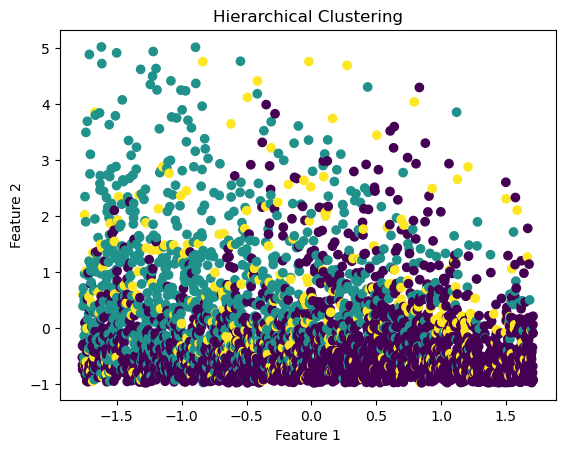

In [19]:
# Visualizing hierarchical clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

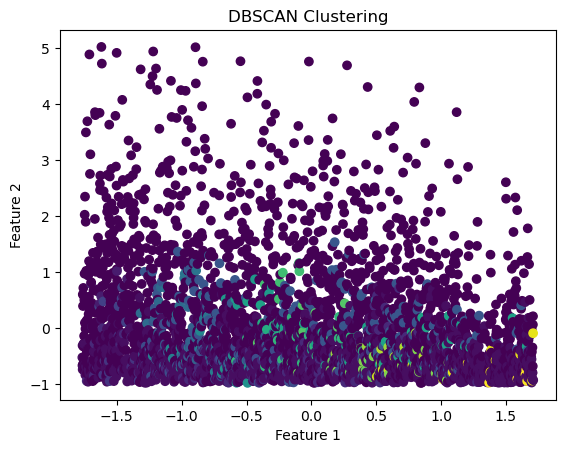

In [20]:
# Visualizing DBSCAN clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
# Silhouette score for Hierarchical Clustering
agglomerative_silhouette_score = silhouette_score(scaled_data, agglomerative_labels)
print("Hierarchical Clustering Silhouette Score:", agglomerative_silhouette_score)

Hierarchical Clustering Silhouette Score: 0.26359050526851413
